## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set Hyper-parameters here
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.75]
LAYER_NUM = [[512, 256, 128], [512, 256, 128, 64], [512, 256, 128, 64, 32]]

In [7]:
results = {}
"""
Write your training loop and record results
"""

for layer in LAYER_NUM:
    for drop in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LAYER_NUM = %s, Dropout_EXP = %.6f" % (str(layer), drop))
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=layer, drp_ratio=drop)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-layer-%s" % str(layer) + " , " + "exp-drop-%s" % str(drop)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LAYER_NUM = [512, 256, 128], Dropout_EXP = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_

50000/50000 [==============================] - 2s 40us/step - loss: 1.4838 - acc: 0.4653 - val_loss: 1.4338 - val_acc: 0.4920
Epoch 50/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4731 - acc: 0.4687 - val_loss: 1.4263 - val_acc: 0.4975
Experiment with LAYER_NUM = [512, 256, 128], Dropout_EXP = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_

50000/50000 [==============================] - 2s 40us/step - loss: 1.9186 - acc: 0.2885 - val_loss: 1.9856 - val_acc: 0.2778
Epoch 48/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9236 - acc: 0.2854 - val_loss: 2.0412 - val_acc: 0.2603
Epoch 49/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9285 - acc: 0.2825 - val_loss: 1.9750 - val_acc: 0.2963
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9256 - acc: 0.2876 - val_loss: 2.0182 - val_acc: 0.2731
Experiment with LAYER_NUM = [512, 256, 128], Dropout_EXP = 0.750000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________________________________

50000/50000 [==============================] - 2s 41us/step - loss: 2.3026 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.3027 - acc: 0.0954 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3027 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Experiment with LAYER_NUM = [512, 256, 128, 64], Dropout_EXP = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape     

50000/50000 [==============================] - 2s 42us/step - loss: 1.6031 - acc: 0.4227 - val_loss: 1.5562 - val_acc: 0.4511
Epoch 42/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6028 - acc: 0.4287 - val_loss: 1.5333 - val_acc: 0.4624
Epoch 43/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5922 - acc: 0.4299 - val_loss: 1.5389 - val_acc: 0.4563
Epoch 44/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5999 - acc: 0.4270 - val_loss: 1.5304 - val_acc: 0.4603
Epoch 45/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5908 - acc: 0.4288 - val_loss: 1.5264 - val_acc: 0.4616
Epoch 46/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5912 - acc: 0.4329 - val_loss: 1.5261 - val_acc: 0.4570
Epoch 47/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5868 - acc: 0.4299 - val_loss: 1.5126 - val_acc: 0.4677
Epoch 48/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 43us/step - loss: 2.0054 - acc: 0.2321 - val_loss: 2.0521 - val_acc: 0.2299
Epoch 38/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.0066 - acc: 0.2303 - val_loss: 2.0397 - val_acc: 0.2447
Epoch 39/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.0067 - acc: 0.2260 - val_loss: 2.0633 - val_acc: 0.2295
Epoch 40/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.0027 - acc: 0.2287 - val_loss: 2.0483 - val_acc: 0.2359
Epoch 41/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.0033 - acc: 0.2309 - val_loss: 2.0571 - val_acc: 0.2337
Epoch 42/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.0031 - acc: 0.2342 - val_loss: 2.0493 - val_acc: 0.2415
Epoch 43/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9971 - acc: 0.2339 - val_loss: 2.0626 - val_acc: 0.2287
Epoch 44/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 42us/step - loss: 2.3027 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.3028 - acc: 0.1006 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.3028 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.3028 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.3029 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 43us/step - loss: 1.6998 - acc: 0.3883 - val_loss: 1.6107 - val_acc: 0.4242
Epoch 27/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6958 - acc: 0.3896 - val_loss: 1.6112 - val_acc: 0.4334
Epoch 28/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6917 - acc: 0.3918 - val_loss: 1.6023 - val_acc: 0.4366
Epoch 29/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6802 - acc: 0.3948 - val_loss: 1.6074 - val_acc: 0.4355
Epoch 30/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6873 - acc: 0.3916 - val_loss: 1.6049 - val_acc: 0.4305A: 0s - loss: 1.6875 -
Epoch 31/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6838 - acc: 0.3957 - val_loss: 1.6406 - val_acc: 0.4202 acc: 0.395
Epoch 32/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6743 - acc: 0.3972 - val_loss: 1.5977 - val_acc: 0.4319
Epoch 33/50
5

50000/50000 [==============================] - 2s 43us/step - loss: 2.1081 - acc: 0.1776 - val_loss: 2.1816 - val_acc: 0.1638
Epoch 20/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1061 - acc: 0.1781 - val_loss: 2.2151 - val_acc: 0.1408
Epoch 21/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1027 - acc: 0.1827 - val_loss: 2.1919 - val_acc: 0.1570
Epoch 22/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1074 - acc: 0.1800 - val_loss: 2.2075 - val_acc: 0.1547
Epoch 23/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1043 - acc: 0.1834 - val_loss: 2.1723 - val_acc: 0.1601
Epoch 24/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0994 - acc: 0.1808 - val_loss: 2.2025 - val_acc: 0.1487s: 2.0988 - acc: 0.
Epoch 25/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.1039 - acc: 0.1827 - val_loss: 2.2283 - val_acc: 0.1401
Epoch 26/50
50000/50000 [==

Epoch 13/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.10007 - a
Epoch 14/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.3027 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.3027 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.3027 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.3027 - acc: 0.0963 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 20/50
50000/50000 [====

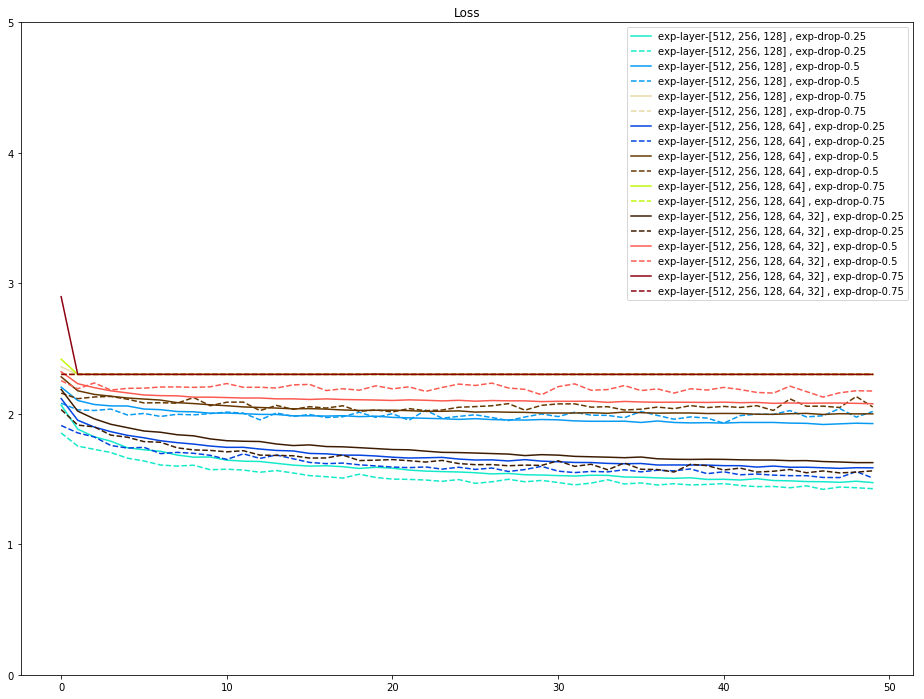

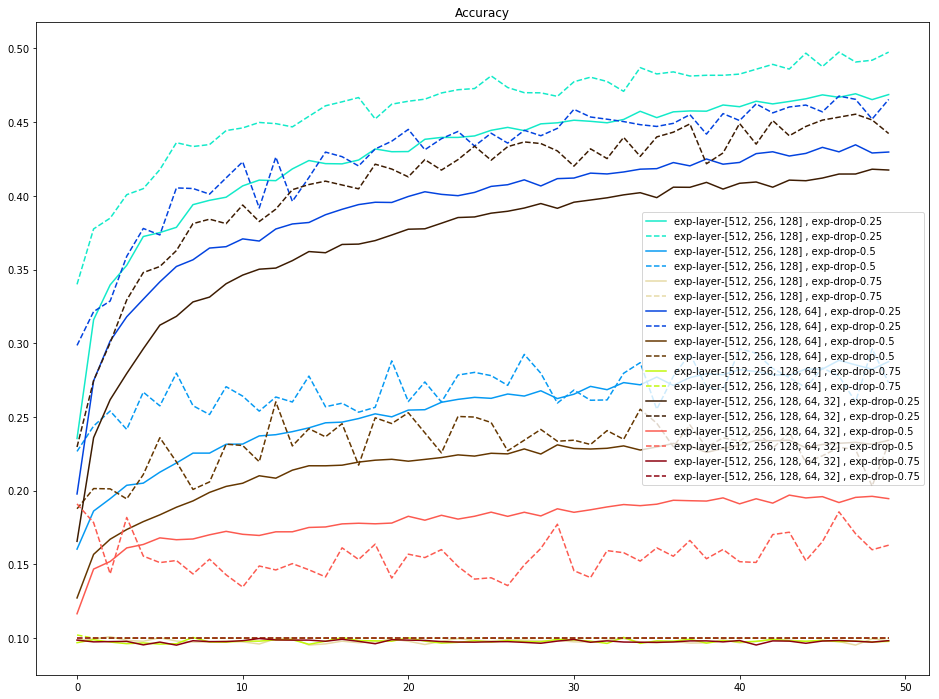

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Plot results
"""
color_bar = ["xkcd:aqua", "xkcd:azure", "xkcd:beige", "xkcd:blue", "xkcd:brown", "xkcd:chartreuse", 
             "xkcd:chocolate", "xkcd:coral", "xkcd:crimson", "xkcd:cyan", "xkcd:darkblue", "xkcd:darkgreen", 
             "xkcd:fuchsia", "xkcd:gold", "xkcd:green", "xkcd:gray", "xkcd:indigo", "xkcd:ivory", 
             "xkcd:khaki", "xkcd:lavender", "xkcd:lightblue", "xkcd:lightgreen", "xkcd:lime", "xkcd:orange"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()